# Here I will start a small scale analysis (of 6 months of 2007)
This is bringing in some of the data organizing that I started with as well as some of the analysis that was experimented with in prior notebooks.

In [67]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [81]:
# import libraries
import xml.etree.ElementTree as Et
import glob
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import pickle
from pprint import pprint
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import seaborn as sns

In [91]:
pd2007 = pickle.load(open("nyt-2007.p", "rb"))
pd2007.head()

,DOCID,Date,Month,Year,Name,Text
0,1815718,1,1,2007,"BLUMENTHAL, MARTIN",blumenthal--martin. a new york business man an...
0,1815719,1,1,2007,"BRADLEY, CAROL L.","bradley--carol l., 84, of tinton falls, nj die..."
0,1815720,1,1,2007,"CRAWFORD, PERRY JR.","crawford--perry jr., died at 89 on december 13..."
0,1815721,1,1,2007,"FLOOD, ROBERT FRANCIS","flood--robert francis, husband of the late cat..."
0,1815722,1,1,2007,"GEISLER, ENID (FRIEDMAN)","geisler--enid (friedman), on december 29, 2006..."


In [92]:
pd2007 = pd2007.reset_index()
pd2007 = pd2007.sort_values('Name', ascending=True)
pd2007.head()

,index,DOCID,Date,Month,Year,Name,Text
43484,0,1844820,4,5,2007,".ROWN, SHERROD (SEN)",three democratic senators yesterday proposed u...
20865,0,1826921,18,2,2007,50 CENT,"late in the afternoon of jan. 16, a swat team ..."
33935,0,1837135,1,4,2007,"AALTO, ALVAR",to promote britain's first major retrospective...
33933,0,1837135,1,4,2007,"AALTO, ALVAR (1898-1976)",to promote britain's first major retrospective...
23452,0,1829159,27,2,2007,"AARON, DORA","aaron--dora, died february 25. wife of the lat..."


In [173]:
names = list(set(pd2007["Name"]))
names

['ROLANDO, ANTONIO (DR)',
 'SHAIN, ARTHUR, D.D.S., M.P.H.',
 'KATZ, DAVID L (DR)',
 'KERR, JAMES',
 'KOST, JEREMY',
 'SPINELLA, STEPHEN',
 'BRADY, TOM',
 'LONG, GREGORY',
 'CAHILL, JOHN P',
 'KOCH, EDWARD I',
 'ROBERTSON, STEWART',
 'BARBER, ANNA',
 'SPOON, ALAN G',
 'LI YU',
 'FLEISCHMANN, ANDREW M (REPR)',
 'MCCARDELL, CHARLES',
 'PASACHOFF, ANNE',
 'MULLINS, CAROL',
 'COHEN, JEFFREY PHILLIP',
 'STIFFLER, LONNIE',
 'TISHMAN, MARCIA',
 'CUPID, MARK',
 'MILLER, HARVEY R',
 'LIANG, EDWARD',
 'BAIUL, OKSANA',
 'RUMSFELD, DONALD H (SEC)',
 'ROBERTS, TRACY ANN',
 'ZWILLING, JOSEPH',
 'PRINCE, RICHARD',
 'JOHNSON, CRAIG M',
 'AMBLE, SUSAN LOUISE (SUSAN LOUISE HIGGINS)',
 'BROPHY, DONAL',
 'ODIERNO, STEPHAN',
 'WEITZNER, ARI',
 'KATZ, LARRY',
 'PICKEL, ROSE',
 'VARLEY, JOHN',
 'EDELMAN, ABRAHAM H. (HANK)',
 'ROMEO, ROBERT',
 'FRIEDLANDER, SHELDON K.',
 'MILLER, STEPHEN C',
 'MORE, JOSEPH (DR)',
 'MARLOWE, CHRISTOPHER (1564-93)',
 'ARPINO, GERALD',
 "O'DONNELL, DENISE E (US ATTY)",
 'RUDD, RO

# START WORK ON ANALYSIS FOR SPECIFIC PEOPLE AND GENERATE VISUALIZATION

In [180]:
name = "OBAMA, BARACK"
subdf = pd2007.loc[pd2007["Name"] == name]
if len(subdf) > 0:
    print(subdf, len(subdf))

       index    DOCID Date Month  Year           Name  \
39865      0  1841832   21     4  2007  OBAMA, BARACK   
12260      0  1822119   28     1  2007  OBAMA, BARACK   
38351      0  1840592   15     4  2007  OBAMA, BARACK   
16022      0  1824139    6     2  2007  OBAMA, BARACK   
13507      0  1822756   31     1  2007  OBAMA, BARACK   
26448      0  1831404    8     3  2007  OBAMA, BARACK   
50329      0  1850421   27     5  2007  OBAMA, BARACK   
10611      0  1821182   24     1  2007  OBAMA, BARACK   
9695       0  1820735   22     1  2007  OBAMA, BARACK   
18503      0  1825539   11     2  2007  OBAMA, BARACK   
22340      0  1828161   23     2  2007  OBAMA, BARACK   
31716      0  1835355   25     3  2007  OBAMA, BARACK   
36509      0  1839179    9     4  2007  OBAMA, BARACK   
7499       0  1819626   18     1  2007  OBAMA, BARACK   
23386      0  1829083   26     2  2007  OBAMA, BARACK   
23392      0  1829084   26     2  2007  OBAMA, BARACK   
14715      0  1823382    3     

In [181]:
subdf.drop_duplicates(subset='DOCID').head()

,index,DOCID,Date,Month,Year,Name,Text
39865,0,1841832,21,4,2007,"OBAMA, BARACK",grappling with one of the biggest domestic pol...
12260,0,1822119,28,1,2007,"OBAMA, BARACK",hillary clinton has an answer to those who sus...
38351,0,1840592,15,4,2007,"OBAMA, BARACK",it was never too hard to figure out a big part...
16022,0,1824139,6,2,2007,"OBAMA, BARACK",as hollywood closes in on oscar night with its...
13507,0,1822756,31,1,2007,"OBAMA, BARACK",some of the nation's most enduring memories of...


In [182]:
subdf = subdf.sort_values(['Year', 'Month', 'Date'], ascending=[True, True, True])
subdf.head()

,index,DOCID,Date,Month,Year,Name,Text
6153,0,1818955,14,1,2007,"OBAMA, BARACK","on friday morning, as the capital was enmeshed..."
7051,0,1819443,17,1,2007,"OBAMA, BARACK","two years after arriving in washington, senato..."
7499,0,1819626,18,1,2007,"OBAMA, BARACK","there is always, it seems, a fresh new face br..."
7576,0,1819652,18,1,2007,"OBAMA, BARACK",senator hillary rodham clinton on wednesday ca...
7697,0,1819713,18,1,2007,"OBAMA, BARACK",the climate here has definitely changed.


In [183]:
subdf['Full_Date'] = subdf['Month'] + "-" + subdf['Date'] + "-" + subdf['Year']
subdf['NEG'] = subdf.apply(lambda row: sia.polarity_scores(row.Text).get("neg"), axis=1)
subdf['NEU'] = subdf.apply(lambda row: sia.polarity_scores(row.Text).get("neu"), axis=1)
subdf['POS'] = subdf.apply(lambda row: sia.polarity_scores(row.Text).get("pos"), axis=1)
subdf.head()

,index,DOCID,Date,Month,Year,Name,Text,Full_Date,NEG,NEU,POS
6153,0,1818955,14,1,2007,"OBAMA, BARACK","on friday morning, as the capital was enmeshed...",1-14-2007,0.048,0.952,0.000
7051,0,1819443,17,1,2007,"OBAMA, BARACK","two years after arriving in washington, senato...",1-17-2007,0.000,0.893,0.107
7499,0,1819626,18,1,2007,"OBAMA, BARACK","there is always, it seems, a fresh new face br...",1-18-2007,0.000,0.929,0.071
7576,0,1819652,18,1,2007,"OBAMA, BARACK",senator hillary rodham clinton on wednesday ca...,1-18-2007,0.178,0.822,0.000
7697,0,1819713,18,1,2007,"OBAMA, BARACK",the climate here has definitely changed.,1-18-2007,0.000,0.649,0.351


([<matplotlib.patches.Wedge at 0x128cd5ba8>,
  <matplotlib.text.Text at 0x128cd9f98>])

========== SENTIMENT RESULTS ==========
POI: OBAMA, BARACK
POS SKEWED ARTICLES: 61
NEG SKEWED ARTICLES: 35
ENTIRELY NEUTRAL: 16


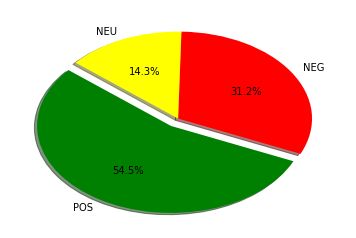

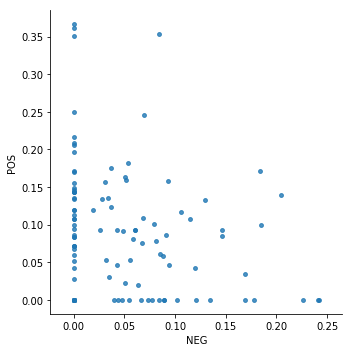

In [188]:
# Create Piechart
labels = ["POS", "NEG", "NEU"]
sizes = [len(subdf.loc[subdf["POS"] > subdf["NEG"]]), len(subdf.loc[subdf["POS"] < subdf["NEG"]]), len(subdf.loc[subdf["NEU"] == 1])]
colors = ['green', 'red', 'yellow']
explode = (0.1, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Create NEG VS POS Scatterplot
x_col='NEG'
y_col='POS'
sns.lmplot(x=x_col,
           y=y_col,
           data=subdf,
           fit_reg=False,
           scatter_kws={"s": 15})

# Print Descriptive Information
print("========== SENTIMENT RESULTS ==========")
print("POI:", name)
print("POS SKEWED ARTICLES:", len(subdf.loc[subdf["POS"] > subdf["NEG"]]))
print("NEG SKEWED ARTICLES:", len(subdf.loc[subdf["POS"] < subdf["NEG"]]))
print("ENTIRELY NEUTRAL:", len(subdf.loc[subdf["NEU"] == 1]))
plt.show()